In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ** DATA PREPROCESSING **

In [2]:
raw = pd.read_csv('data_train.csv', index_col=0)

In [3]:
raw.head()

,hash,trajectory_id,time_entry,time_exit,vmax,vmin,vmean,x_entry,y_entry,x_exit,y_exit
0,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_0,07:04:31,07:08:32,NaN,NaN,NaN,3.751014e+06,-1.909398e+07,3.750326e+06,-1.913634e+07
1,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_1,07:20:34,07:25:42,NaN,NaN,NaN,3.743937e+06,-1.932247e+07,3.744975e+06,-1.931966e+07
2,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_2,07:53:32,08:03:25,NaN,NaN,NaN,3.744868e+06,-1.929356e+07,3.744816e+06,-1.929284e+07
3,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_3,08:17:50,08:37:23,NaN,NaN,NaN,3.744880e+06,-1.929229e+07,3.744809e+06,-1.929049e+07
4,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_4,14:38:09,14:38:09,NaN,NaN,NaN,3.744909e+06,-1.928558e+07,3.744909e+06,-1.928558e+07


## Variables Description

|Variables|Type|Description|
|:--|:--|:--|
|hash|String|Represents the unique identifier of a device|
|trajectory_id|String|Represents the unique identifier of a trajectory associated to a device|
|time_entry|Date|Indicates the local time for the starting point of the trajectory (HH:mm:ss)|
|time_exit|Date|Indicates the local time for the ending point of the trajectory (HH:mm:ss)|
|vmax|Integer|Represents the maximum velocity registered in the course of a trajectory|
|vmin|Integer|Represents the minimum velocity registered in the course of a trajectory|
|vmean|Integer|Represents the average velocity registered in the course of a trajectory|
|x_entry|Double|Entry x coordinate (cartessian projected position)|
|y_entry|Double|Entry y coordinate (cartessian projected position)|
|x_exit|Double|Exit x coordinate (cartessian projected position)|
|y_entry|Double|Exit y coordinate (cartessian projected position)|

In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814262 entries, 0 to 814261
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   hash           814262 non-null  object 
 1   trajectory_id  814262 non-null  object 
 2   time_entry     814262 non-null  object 
 3   time_exit      814262 non-null  object 
 4   vmax           256769 non-null  float64
 5   vmin           256769 non-null  float64
 6   vmean          270778 non-null  float64
 7   x_entry        814262 non-null  float64
 8   y_entry        814262 non-null  float64
 9   x_exit         814262 non-null  float64
 10  y_exit         814262 non-null  float64
dtypes: float64(7), object(4)
memory usage: 74.5+ MB


In [5]:
raw.describe().T

,count,mean,std,min,25%,50%,75%,max
vmax,256769.0,2.680249e+00,7.591053,-1.000000e+00,0.000000e+00,0.000000e+00,5.000000e-01,1.620000e+02
vmin,256769.0,2.279469e+00,7.118452,-1.000000e+00,-1.000000e+00,0.000000e+00,2.200000e-01,1.620000e+02
vmean,270778.0,2.454799e+00,7.160578,-1.000000e+00,0.000000e+00,0.000000e+00,4.400000e-01,1.620000e+02
x_entry,814262.0,3.760411e+06,8974.393381,3.741027e+06,3.755174e+06,3.760071e+06,3.767509e+06,3.777099e+06
y_entry,814262.0,-1.922153e+07,76322.341694,-1.938291e+07,-1.927454e+07,-1.923020e+07,-1.916999e+07,-1.904266e+07
x_exit,814262.0,3.760426e+06,8904.450508,3.740998e+06,3.755359e+06,3.760076e+06,3.767455e+06,3.777055e+06
y_exit,814262.0,-1.922181e+07,75155.599195,-1.937688e+07,-1.927308e+07,-1.923031e+07,-1.917193e+07,-1.904666e+07


In [6]:
raw.describe(include='O').T

,count,unique,top,freq
hash,814262,134063,76a5c3305379ff57d1d967d08ce554a5_31,20
trajectory_id,814262,814262,traj_16bcf89061f0ed0164ba0ee1a241dbf2_19_3,1
time_entry,814262,56765,15:03:00,103
time_exit,814262,56772,15:07:03,104


trajectory_id is unique (primary key)

In [7]:
# change data type from object to datetime
raw['time_entry'] = pd.to_datetime(raw['time_entry'])
raw['time_exit'] = pd.to_datetime(raw['time_exit'])

In [8]:
entry_dt = raw['time_entry'].dt
exit_dt = raw['time_exit'].dt

In [9]:
# extract time_entry as hour, create new column 'entry_hour'
raw['entry_hour'] = entry_dt.hour

# extract time_exit as hour, create new column 'exit_hour'
raw['exit_hour'] = exit_dt.hour

In [10]:
raw.head()

,hash,trajectory_id,time_entry,time_exit,vmax,vmin,vmean,x_entry,y_entry,x_exit,y_exit,entry_hour,exit_hour
0,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_0,2021-03-22 07:04:31,2021-03-22 07:08:32,NaN,NaN,NaN,3.751014e+06,-1.909398e+07,3.750326e+06,-1.913634e+07,7,7
1,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_1,2021-03-22 07:20:34,2021-03-22 07:25:42,NaN,NaN,NaN,3.743937e+06,-1.932247e+07,3.744975e+06,-1.931966e+07,7,7
2,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_2,2021-03-22 07:53:32,2021-03-22 08:03:25,NaN,NaN,NaN,3.744868e+06,-1.929356e+07,3.744816e+06,-1.929284e+07,7,8
3,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_3,2021-03-22 08:17:50,2021-03-22 08:37:23,NaN,NaN,NaN,3.744880e+06,-1.929229e+07,3.744809e+06,-1.929049e+07,8,8
4,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_4,2021-03-22 14:38:09,2021-03-22 14:38:09,NaN,NaN,NaN,3.744909e+06,-1.928558e+07,3.744909e+06,-1.928558e+07,14,14


In [11]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814262 entries, 0 to 814261
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   hash           814262 non-null  object        
 1   trajectory_id  814262 non-null  object        
 2   time_entry     814262 non-null  datetime64[ns]
 3   time_exit      814262 non-null  datetime64[ns]
 4   vmax           256769 non-null  float64       
 5   vmin           256769 non-null  float64       
 6   vmean          270778 non-null  float64       
 7   x_entry        814262 non-null  float64       
 8   y_entry        814262 non-null  float64       
 9   x_exit         814262 non-null  float64       
 10  y_exit         814262 non-null  float64       
 11  entry_hour     814262 non-null  int64         
 12  exit_hour      814262 non-null  int64         
dtypes: datetime64[ns](2), float64(7), int64(2), object(2)
memory usage: 87.0+ MB


In [12]:
raw.isnull().sum()

hash                  0
trajectory_id         0
time_entry            0
time_exit             0
vmax             557493
vmin             557493
vmean            543484
x_entry               0
y_entry               0
x_exit                0
y_exit                0
entry_hour            0
exit_hour             0
dtype: int64

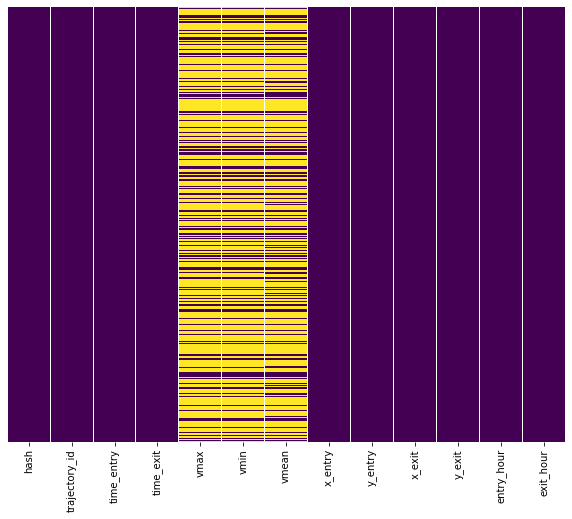

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(raw.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

### Insight:

Most vmax, vmin, and vmean data are null

In [14]:
raw[['vmax', 'vmin', 'vmean']].describe().T

,count,mean,std,min,25%,50%,75%,max
vmax,256769.0,2.680249,7.591053,-1.0,0.0,0.0,0.50,162.0
vmin,256769.0,2.279469,7.118452,-1.0,-1.0,0.0,0.22,162.0
vmean,270778.0,2.454799,7.160578,-1.0,0.0,0.0,0.44,162.0


In [15]:
raw[(pd.notnull(raw['vmin']) == True) & (pd.notnull(raw['vmax']) == True)]['vmean'].isnull().sum()

0

In [16]:
raw[pd.notnull(raw['vmin']) == True]['vmax'].isnull().sum()

0

In [17]:
raw[pd.notnull(raw['vmean']) == True]['vmax'].isnull().sum()

14009

### Insight

1. Existing data with features vmin and vmax that are non-null have the same data points (256769). After being checked, all 256769 data are within the same data points, different case with existing vmean data.
2. Existing data with vmean feature that are non-null are counted 270778 data points. In these data points, there are 14009 vmax and vmin data (which are the same data points) that are null.

In [18]:
raw['duration'] = raw['time_exit'] - raw['time_entry']

In [19]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814262 entries, 0 to 814261
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype          
---  ------         --------------   -----          
 0   hash           814262 non-null  object         
 1   trajectory_id  814262 non-null  object         
 2   time_entry     814262 non-null  datetime64[ns] 
 3   time_exit      814262 non-null  datetime64[ns] 
 4   vmax           256769 non-null  float64        
 5   vmin           256769 non-null  float64        
 6   vmean          270778 non-null  float64        
 7   x_entry        814262 non-null  float64        
 8   y_entry        814262 non-null  float64        
 9   x_exit         814262 non-null  float64        
 10  y_exit         814262 non-null  float64        
 11  entry_hour     814262 non-null  int64          
 12  exit_hour      814262 non-null  int64          
 13  duration       814262 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), float64(7), in

In [20]:
raw['duration'].describe().T

count                    814262
mean     0 days 00:05:47.010593
std      0 days 00:10:23.143284
min             0 days 00:00:00
25%             0 days 00:00:00
50%             0 days 00:00:00
75%             0 days 00:08:00
max             0 days 06:49:37
Name: duration, dtype: object

### Brainstorming:

1. For features vmax, vmin, and vmean are redundant to each other since only one velocity data is already enough to give information to generete model.
2. From the dataset, the coordinate x and y for points entry and exit are known, as well as the duration of the trip (difference between entry and exit time). These data could also give information about velocity (since velocity is equal to distance difference divided by duration of trip).

#### Model will be generated with the existing data of coordinate (entry and exit) points and the duration of the trip. Velocity columns (vmin, vmax, and vmean) assumed to be represented by the division of distance to time difference (duration).

In [21]:
desc = []

for i in raw.columns:
    desc.append([
        i,
        raw[i].dtypes,
        raw[i].isnull().sum(),
        round((((raw[i].isnull().sum())/(len(raw)))*100), 2),
        raw[i].nunique(),
        raw[i].drop_duplicates().sample(2).values
    ])

In [22]:
dfDesc = pd.DataFrame(desc, columns=['dataFeatures', 'dataType', 'null', 'nullPercentage', 'unique', 'uniqueSample'])
dfDesc

,dataFeatures,dataType,null,nullPercentage,unique,uniqueSample
0,hash,object,0,0.00,134063,"[0d4395e044cc8971d72a6692292dfdcb_1, c2aa71510..."
1,trajectory_id,object,0,0.00,814262,"[traj_6a06b2b236097736982e902722b6d99c_23_12, ..."
2,time_entry,datetime64[ns],0,0.00,56765,"[2021-03-22T06:43:01.000000000, 2021-03-22T03:..."
3,time_exit,datetime64[ns],0,0.00,56772,"[2021-03-22T02:45:40.000000000, 2021-03-22T00:..."
4,vmax,float64,557493,68.47,28296,"[29.229883194, 0.9252733]"
5,vmin,float64,557493,68.47,26528,"[0.6200000047683716, 14.1899995804]"
6,vmean,float64,543484,66.75,32935,"[15.567601000000002, 2.9352991580963]"
7,x_entry,float64,0,0.00,32269,"[3767910.9549133005, 3756249.125057797]"
8,y_entry,float64,0,0.00,29042,"[-19107615.446382053, -19238847.013359807]"
9,x_exit,float64,0,0.00,32255,"[3763040.727191097, 3747679.7506565317]"


### Insights:

for vmax, vmin, and vmean, null percentage are relatively high, so the non-null data are only around 30%. Since there are too much null data, vmax, vmin, and vmean will be dropped for further modeling.

In [23]:
df = raw.drop(columns=['vmax', 'vmin', 'vmean'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814262 entries, 0 to 814261
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype          
---  ------         --------------   -----          
 0   hash           814262 non-null  object         
 1   trajectory_id  814262 non-null  object         
 2   time_entry     814262 non-null  datetime64[ns] 
 3   time_exit      814262 non-null  datetime64[ns] 
 4   x_entry        814262 non-null  float64        
 5   y_entry        814262 non-null  float64        
 6   x_exit         814262 non-null  float64        
 7   y_exit         814262 non-null  float64        
 8   entry_hour     814262 non-null  int64          
 9   exit_hour      814262 non-null  int64          
 10  duration       814262 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), int64(2), object(2), timedelta64[ns](1)
memory usage: 74.5+ MB


In [25]:
df['duration'].describe().T

count                    814262
mean     0 days 00:05:47.010593
std      0 days 00:10:23.143284
min             0 days 00:00:00
25%             0 days 00:00:00
50%             0 days 00:00:00
75%             0 days 00:08:00
max             0 days 06:49:37
Name: duration, dtype: object

In [26]:
df['duration']/np.timedelta64(1,'s')

0          241.0
1          308.0
2          593.0
3         1173.0
4            0.0
           ...  
814257       0.0
814258       0.0
814259       0.0
814260     409.0
814261     439.0
Name: duration, Length: 814262, dtype: float64

In [27]:
df['duration_s'] = df['duration']/np.timedelta64(1,'s')

In [28]:
df['duration'].dt.components

,days,hours,minutes,seconds,milliseconds,microseconds,nanoseconds
0,0,0,4,1,0,0,0
1,0,0,5,8,0,0,0
2,0,0,9,53,0,0,0
3,0,0,19,33,0,0,0
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
814257,0,0,0,0,0,0,0
814258,0,0,0,0,0,0,0
814259,0,0,0,0,0,0,0
814260,0,0,6,49,0,0,0


# ** EDA **

## - duration -

In [29]:
df['duration_s'].describe()

count    814262.000000
mean        347.010594
std         623.143284
min           0.000000
25%           0.000000
50%           0.000000
75%         480.000000
max       24577.000000
Name: duration_s, dtype: float64

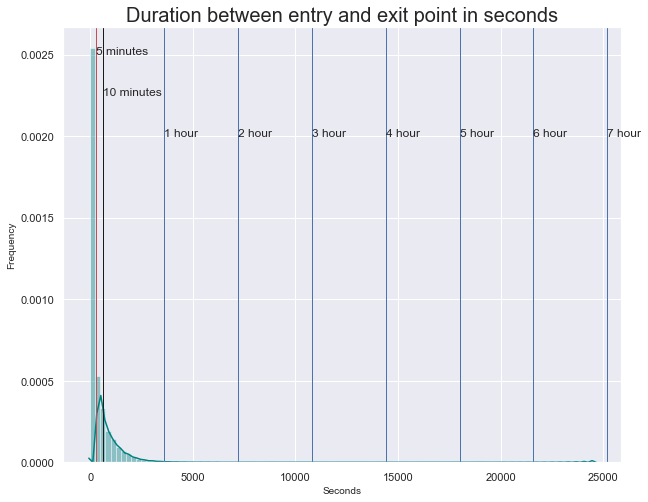

In [30]:
plt.figure(figsize=(10, 8))
sns.set(style='darkgrid')
sns.distplot(df['duration_s'], bins=100, color='teal')
plt.title('Duration between entry and exit point in seconds', fontsize=20)
plt.xlabel('Seconds', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.axvline(x=300, linewidth=1, color = 'r')
plt.axvline(x=600, linewidth=1, color = 'k')
plt.axvline(x=3600, linewidth=1, color = 'b')
plt.axvline(x=7200, linewidth=1, color = 'b')
plt.axvline(x=10800, linewidth=1, color = 'b')
plt.axvline(x=14400, linewidth=1, color = 'b')
plt.axvline(x=18000, linewidth=1, color = 'b')
plt.axvline(x=21600, linewidth=1, color = 'b')
plt.axvline(x=25200, linewidth=1, color = 'b')

plt.text(300, 0.0025, '5 minutes', fontsize=12)
plt.text(600, 0.00225, '10 minutes', fontsize=12)
plt.text(3600, 0.002, '1 hour', fontsize=12)
plt.text(7200, 0.002, '2 hour', fontsize=12)
plt.text(10800, 0.002, '3 hour', fontsize=12)
plt.text(14400, 0.002, '4 hour', fontsize=12)
plt.text(18000, 0.002, '5 hour', fontsize=12)
plt.text(21600, 0.002, '6 hour', fontsize=12)
plt.text(25200, 0.002, '7 hour', fontsize=12)
plt.show()
# plt.savefig('./plot/hist_price.png')

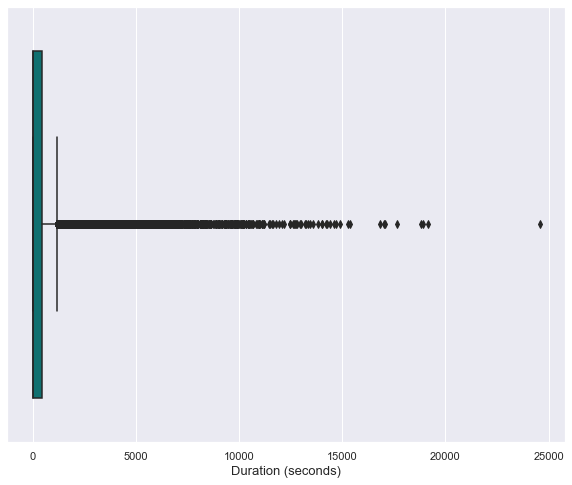

In [31]:
plt.figure(figsize=(10, 8))

sns.boxplot(df['duration_s'], color='teal')
plt.xlabel('Duration (seconds)', fontsize=13)
plt.show()

In [32]:
print(f"Mean Duration in seconds = {df['duration_s'].mean()} seconds")
print(f"Median Duration in seconds = {df['duration_s'].median()} seconds")
print(f"Median Duration in seconds = {df['duration_s'].max()} seconds")

Mean Duration in seconds = 347.01059364184994 seconds
Median Duration in seconds = 0.0 seconds
Median Duration in seconds = 24577.0 seconds


## Insight

1. Average duration between entry and exit points is 347 seconds, or 5 minutes and 47 seconds.
2. Median duration between entry and exit points, or the value which is most frequent in the dataset is 0 seconds.
3. The maximum duration recorded is 24,577 seconds, or 6 hours, 49 minutes, and 37 seconds.

In [33]:
df.head()

,hash,trajectory_id,time_entry,time_exit,x_entry,y_entry,x_exit,y_exit,entry_hour,exit_hour,duration,duration_s
0,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_0,2021-03-22 07:04:31,2021-03-22 07:08:32,3.751014e+06,-1.909398e+07,3.750326e+06,-1.913634e+07,7,7,00:04:01,241.0
1,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_1,2021-03-22 07:20:34,2021-03-22 07:25:42,3.743937e+06,-1.932247e+07,3.744975e+06,-1.931966e+07,7,7,00:05:08,308.0
2,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_2,2021-03-22 07:53:32,2021-03-22 08:03:25,3.744868e+06,-1.929356e+07,3.744816e+06,-1.929284e+07,7,8,00:09:53,593.0
3,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_3,2021-03-22 08:17:50,2021-03-22 08:37:23,3.744880e+06,-1.929229e+07,3.744809e+06,-1.929049e+07,8,8,00:19:33,1173.0
4,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_4,2021-03-22 14:38:09,2021-03-22 14:38:09,3.744909e+06,-1.928558e+07,3.744909e+06,-1.928558e+07,14,14,00:00:00,0.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814262 entries, 0 to 814261
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype          
---  ------         --------------   -----          
 0   hash           814262 non-null  object         
 1   trajectory_id  814262 non-null  object         
 2   time_entry     814262 non-null  datetime64[ns] 
 3   time_exit      814262 non-null  datetime64[ns] 
 4   x_entry        814262 non-null  float64        
 5   y_entry        814262 non-null  float64        
 6   x_exit         814262 non-null  float64        
 7   y_exit         814262 non-null  float64        
 8   entry_hour     814262 non-null  int64          
 9   exit_hour      814262 non-null  int64          
 10  duration       814262 non-null  timedelta64[ns]
 11  duration_s     814262 non-null  float64        
dtypes: datetime64[ns](2), float64(5), int64(2), object(2), timedelta64[ns](1)
memory usage: 80.8+ MB


In [35]:
# df[df['entry_hour'] != df['exit_hour']]

In [35]:
df[df['duration'] == df['duration'].max()]

,hash,trajectory_id,time_entry,time_exit,x_entry,y_entry,x_exit,y_exit,entry_hour,exit_hour,duration,duration_s
286283,59cccdcfeb502d705f22ae61fcc71327_3,traj_59cccdcfeb502d705f22ae61fcc71327_3_0,2021-03-22 06:05:03,2021-03-22 12:54:40,3.765199e+06,-1.934859e+07,3.767044e+06,-1.934461e+07,6,12,06:49:37,24577.0


### Insight

The longest duration, 24577 seconds, or more than 6 hours happens in the period of 6.00 to 12.00.

The goal of this analysis and modeling is device's ID that is being in the certain location between 15.00 and 16.00.

Device's ID (trajectory) that is already left the point before 15.00 are not target device to be reviewed whether being in the city center of Atlanta or not.

In [36]:
in_range = df[df['exit_hour'] >= 15]

In [37]:
in_range.head()

,hash,trajectory_id,time_entry,time_exit,x_entry,y_entry,x_exit,y_exit,entry_hour,exit_hour,duration,duration_s
5,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_5,2021-03-22 15:02:31,2021-03-22 15:18:33,3.744945e+06,-1.928183e+07,3.744785e+06,-1.928148e+07,15,15,00:16:02,962.0
9,0000cf177130469eeac79f67b6bcf3df_9,traj_0000cf177130469eeac79f67b6bcf3df_9_3,2021-03-22 15:00:32,2021-03-22 15:29:48,3.749088e+06,-1.926605e+07,3.749610e+06,-1.926594e+07,15,15,00:29:16,1756.0
11,0001f97b99a80f18f62e2d44e54ef33d_3,traj_0001f97b99a80f18f62e2d44e54ef33d_3_1,2021-03-22 14:34:35,2021-03-22 15:19:51,3.758738e+06,-1.937594e+07,3.769687e+06,-1.914258e+07,14,15,00:45:16,2716.0
20,0002124248b0ca510dea42824723ccac_31,traj_0002124248b0ca510dea42824723ccac_31_10,2021-03-22 15:28:54,2021-03-22 15:28:54,3.767866e+06,-1.917797e+07,3.767866e+06,-1.917797e+07,15,15,00:00:00,0.0
28,000219c2a6380c307e8bffd85b5e404b_23,traj_000219c2a6380c307e8bffd85b5e404b_23_16,2021-03-22 15:08:05,2021-03-22 15:08:05,3.747641e+06,-1.922695e+07,3.747641e+06,-1.922695e+07,15,15,00:00:00,0.0


In [38]:
in_range.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134063 entries, 5 to 814261
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype          
---  ------         --------------   -----          
 0   hash           134063 non-null  object         
 1   trajectory_id  134063 non-null  object         
 2   time_entry     134063 non-null  datetime64[ns] 
 3   time_exit      134063 non-null  datetime64[ns] 
 4   x_entry        134063 non-null  float64        
 5   y_entry        134063 non-null  float64        
 6   x_exit         134063 non-null  float64        
 7   y_exit         134063 non-null  float64        
 8   entry_hour     134063 non-null  int64          
 9   exit_hour      134063 non-null  int64          
 10  duration       134063 non-null  timedelta64[ns]
 11  duration_s     134063 non-null  float64        
dtypes: datetime64[ns](2), float64(5), int64(2), object(2), timedelta64[ns](1)
memory usage: 13.3+ MB


In [39]:
in_range.describe().T

,count,mean,std,min,25%,50%,75%,max
x_entry,134063,3.76046e+06,9139.15,3.74103e+06,3.75514e+06,3.76018e+06,3.76769e+06,3.7771e+06
y_entry,134063,-1.9222e+07,76162.6,-1.93767e+07,-1.92762e+07,-1.92303e+07,-1.91716e+07,-1.90469e+07
x_exit,134063,3.76044e+06,9245.82,3.74103e+06,3.75475e+06,3.76013e+06,3.76777e+06,3.77705e+06
y_exit,134063,-1.92215e+07,78329,-1.93768e+07,-1.92783e+07,-1.923e+07,-1.91672e+07,-1.90467e+07
entry_hour,134063,14.8609,0.352727,10,15,15,15,16
exit_hour,134063,15.0002,0.0139249,15,15,15,15,16
duration,134063,0 days 00:06:55.005146,0 days 00:11:40.589215,0 days 00:00:00,0 days 00:00:00,0 days 00:00:01,0 days 00:09:54,0 days 05:19:00
duration_s,134063,415.005,700.589,0,0,1,594,19140


In [40]:
in_range.describe(include='O').T

,count,unique,top,freq
hash,134063,134063,9ee5b9f74e1e4f11302400f99305a5b0_1,1
trajectory_id,134063,134063,traj_6127f04d7fdc1eb5670fcbbc2ba53792_19_4,1


In [41]:
in_range[in_range['entry_hour'] < 15]['entry_hour'].value_counts()

14    18237
13      164
12       23
11        5
10        3
Name: entry_hour, dtype: int64

In [42]:
in_range['time_exit'].describe()

count                  134063
unique                   3601
top       2021-03-22 15:07:03
freq                      104
first     2021-03-22 15:00:00
last      2021-03-22 16:00:00
Name: time_exit, dtype: object

In [43]:
in_range['time_entry'].describe()

count                  134063
unique                   6321
top       2021-03-22 15:03:00
freq                      103
first     2021-03-22 10:33:25
last      2021-03-22 16:00:00
Name: time_entry, dtype: object

In [45]:
df.isnull().sum()

hash             0
trajectory_id    0
time_entry       0
time_exit        0
x_entry          0
y_entry          0
x_exit           0
y_exit           0
entry_hour       0
exit_hour        0
duration         0
duration_s       0
dtype: int64

# ** FEATURE ENGINEERING & FEATURE SELECTION **

Target column: exit point (x and y)

In [48]:
df.describe(include='O').T

,count,unique,top,freq
hash,814262,134063,679e95292c197c82fe7d93be0ca700b8_25,20
trajectory_id,814262,814262,traj_3b97f344ace06ede76d716e84d806bc6_9_2,1


In [87]:
df['trajectory_id'].nunique()

814262

In [88]:
df['hash'].nunique()

134063

Since we only analyse device's ID represented by trajectory_id, 'hash' feature assumed to give similar information as trajectory_id, therefore this can be eliminated for further analysis and modeling.

In [102]:
train = df.drop(columns=['hash', 'time_entry', 'time_exit', 'duration'])
train.head()

,trajectory_id,x_entry,y_entry,x_exit,y_exit,entry_hour,exit_hour,duration_s
0,traj_0000a8602cf2def930488dee7cdad104_1_0,3.751014e+06,-1.909398e+07,3.750326e+06,-1.913634e+07,7,7,241.0
1,traj_0000a8602cf2def930488dee7cdad104_1_1,3.743937e+06,-1.932247e+07,3.744975e+06,-1.931966e+07,7,7,308.0
2,traj_0000a8602cf2def930488dee7cdad104_1_2,3.744868e+06,-1.929356e+07,3.744816e+06,-1.929284e+07,7,8,593.0
3,traj_0000a8602cf2def930488dee7cdad104_1_3,3.744880e+06,-1.929229e+07,3.744809e+06,-1.929049e+07,8,8,1173.0
4,traj_0000a8602cf2def930488dee7cdad104_1_4,3.744909e+06,-1.928558e+07,3.744909e+06,-1.928558e+07,14,14,0.0


In [114]:
# train.to_csv('train_reg.csv')

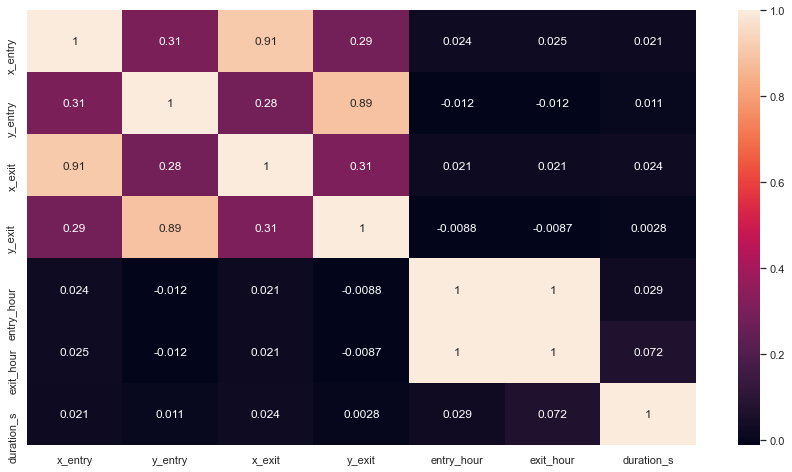

In [92]:
plt.figure(figsize=(15, 8))
sns.heatmap(train.corr(), annot=True)
plt.show()

# ** Train Test Split **

## 1. Predict x_exit

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X = train.drop(columns=['x_exit', 'y_exit'])
y = train['x_exit']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 1. LinearRegression

In [105]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [106]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569983 entries, 333923 to 121958
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   trajectory_id  569983 non-null  object 
 1   x_entry        569983 non-null  float64
 2   y_entry        569983 non-null  float64
 3   entry_hour     569983 non-null  int64  
 4   exit_hour      569983 non-null  int64  
 5   duration_s     569983 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 30.4+ MB


In [110]:
scaledLin = Pipeline([
    ('algo', LinearRegression())
])

In [115]:
scaledLin.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encode', OneHotEncoder(),
                                                  ['trajectory_id'])])),
                ('algo', LinearRegression())])

In [119]:
y_predReg = scaledLin.predict(X_test)

In [152]:
# Evaluation

from sklearn.metrics import r2_score

In [153]:
r2_score(y_test, y_predReg)

0.8284390278368062

### 2. Linear Regression with Scaler

In [120]:
prep = ColumnTransformer([
    ('scale', StandardScaler(), ['x_entry', 'y_entry', 'entry_hour', 'exit_hour', 'duration_s']),
    ('encode', OneHotEncoder(), ['trajectory_id'])
])

scaledLin = Pipeline([
    ('transform', prep),
    ('algo', LinearRegression())
])

In [121]:
scaledLin.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  ['x_entry', 'y_entry',
                                                   'entry_hour', 'exit_hour',
                                                   'duration_s']),
                                                 ('encode', OneHotEncoder(),
                                                  ['trajectory_id'])])),
                ('algo', LinearRegression())])

In [123]:
y_predScaled = scaledLin.predict(X_test)

In [157]:
r2_score(y_test, y_predScaled)

0.8284390278368062

### 3. Ridge

In [158]:
ridge = Ridge()

In [159]:
ridge.fit(X_train, y_train)

Ridge()

In [160]:
y_predRidge = ridge.predict(X_test)

In [161]:
r2_score(y_test, y_predRidge)

0.8284390280576795

### 4. RandomForest

In [162]:
from sklearn.ensemble import RandomForestRegressor

In [163]:
rf = RandomForestRegressor()

In [164]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [165]:
y_predRF = rf.predict(X_test)

In [166]:
r2_score(y_test, y_predRF)

0.8809275000998182

### 5. XGBoost

In [167]:
from xgboost import XGBRFRegressor

In [168]:
model_xgb = XGBRFRegressor()

In [169]:
model_xgb.fit(X_train, y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=0, num_parallel_tree=100,
               objective='reg:squarederror', random_state=0, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None)

In [170]:
y_predxgb = model_xgb.predict(X_test)

In [171]:
r2_score(y_test, y_predxgb)

0.8636602846845456

### Evaluation

In [172]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [173]:
summary = pd.DataFrame()

In [174]:
summary['model'] = ['Linear Regression', 'Linear Regression with Scaler', 'Ridge Regression', 'RandomForest', 'XGBoostRegressor']

In [175]:
summary['MAE'] = [mean_absolute_error(y_test, y_predReg), mean_absolute_error(y_test, y_predScaled), mean_absolute_error(y_test, y_predRidge), mean_absolute_error(y_test, y_predRF), mean_absolute_error(y_test, y_predxgb)]
summary['MSE'] = [mean_squared_error(y_test, y_predReg), mean_squared_error(y_test, y_predScaled), mean_squared_error(y_test, y_predRidge), mean_squared_error(y_test, y_predRF), mean_squared_error(y_test, y_predxgb)]
summary['RMSE'] = [np.sqrt(mean_squared_error(y_test, y_predReg)), np.sqrt(mean_squared_error(y_test, y_predScaled)), np.sqrt(mean_squared_error(y_test, y_predRidge)), np.sqrt(mean_squared_error(y_test, y_predRF)), np.sqrt(mean_squared_error(y_test, y_predxgb)) ]
summary['r2_score'] = [r2_score(y_test, y_predReg), r2_score(y_test, y_predScaled), r2_score(y_test, y_predRidge), r2_score(y_test, y_predRF), r2_score(y_test, y_predxgb)]

In [176]:
summary

,model,MAE,MSE,RMSE,r2_score
0,Linear Regression,1733.698788,1.357778e+07,3684.803539,0.828439
1,Linear Regression with Scaler,1733.698788,1.357778e+07,3684.803539,0.828439
2,Ridge Regression,1733.698786,1.357778e+07,3684.803537,0.828439
3,RandomForest,1211.651853,9.423704e+06,3069.805249,0.880928
4,XGBoostRegressor,1624.248193,1.079028e+07,3284.855576,0.863660


#### Conclusion: RandomForest gives best performance with r2 score of 88%

## Export Model

In [177]:
import joblib

In [178]:
joblib.dump(rf, 'model_x')

['model_x']

## Test Dataset

In [179]:
test = pd.read_csv('data_test.csv', index_col=0)

In [180]:
test.head()

,hash,trajectory_id,time_entry,time_exit,vmax,vmin,vmean,x_entry,y_entry,x_exit,y_exit
0,00032f51796fd5437b238e3a9823d13d_31,traj_00032f51796fd5437b238e3a9823d13d_31_0,11:43:17,11:50:17,NaN,NaN,NaN,3.773413e+06,-1.909828e+07,3.773111e+06,-1.914508e+07
1,00032f51796fd5437b238e3a9823d13d_31,traj_00032f51796fd5437b238e3a9823d13d_31_2,12:21:37,12:21:37,0.0,0.0,0.0,3.773199e+06,-1.914354e+07,3.773199e+06,-1.914354e+07
2,00032f51796fd5437b238e3a9823d13d_31,traj_00032f51796fd5437b238e3a9823d13d_31_3,12:34:27,13:14:11,NaN,NaN,NaN,3.763760e+06,-1.921342e+07,3.771757e+06,-1.911092e+07
3,00032f51796fd5437b238e3a9823d13d_31,traj_00032f51796fd5437b238e3a9823d13d_31_4,13:25:33,13:43:13,NaN,NaN,NaN,3.773385e+06,-1.911344e+07,3.773131e+06,-1.914465e+07
4,00032f51796fd5437b238e3a9823d13d_31,traj_00032f51796fd5437b238e3a9823d13d_31_5,15:03:32,15:10:32,NaN,NaN,NaN,3.773118e+06,-1.914490e+07,NaN,NaN


In [181]:
load_model = joblib.load('model_x')

===========================================================================

## 2. Predict y_exit

In [52]:
X = train.drop(columns=['x_exit', 'y_exit'])
y = train['y_exit']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 1. LinearRegression

In [54]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer

In [55]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569983 entries, 333923 to 121958
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   x_entry     569983 non-null  float64
 1   y_entry     569983 non-null  float64
 2   entry_hour  569983 non-null  int64  
 3   exit_hour   569983 non-null  int64  
 4   duration_s  569983 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 26.1 MB


In [56]:
model_lm = LinearRegression()

In [57]:
model_lm.fit(X_train, y_train)

LinearRegression()

In [58]:
y_predReg_y = model_lm.predict(X_test)

In [59]:
# Evaluation

from sklearn.metrics import r2_score

In [60]:
r2_score(y_test, y_predReg_y)

0.7939862137230903

### 2. Linear Regression with Scaler

In [61]:
prep = ColumnTransformer([
    ('scale', StandardScaler(), ['x_entry', 'y_entry', 'entry_hour', 'exit_hour', 'duration_s'])
])

model_scaledLin = Pipeline([
    ('transform', prep),
    ('algo', LinearRegression())
])

In [62]:
model_scaledLin.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  ['x_entry', 'y_entry',
                                                   'entry_hour', 'exit_hour',
                                                   'duration_s'])])),
                ('algo', LinearRegression())])

In [63]:
y_predScaled_y = model_scaledLin.predict(X_test)

In [64]:
r2_score(y_test, y_predScaled_y)

0.7939862137230906

### 3. Ridge

In [65]:
model_ridge = Ridge()

In [66]:
model_ridge.fit(X_train, y_train)

Ridge()

In [68]:
y_predRidge_y = model_ridge.predict(X_test)

In [69]:
r2_score(y_test, y_predRidge_y)

0.7939862138833995

### 4. RandomForest

In [70]:
from sklearn.ensemble import RandomForestRegressor

In [71]:
model_rf = RandomForestRegressor()

In [72]:
model_rf.fit(X_train, y_train)

RandomForestRegressor()

In [73]:
y_predRF_y = model_rf.predict(X_test)

In [74]:
r2_score(y_test, y_predRF_y)

0.8527806819724919

### 5. XGBoost

In [75]:
from xgboost import XGBRFRegressor

In [76]:
xgb = XGBRFRegressor()

In [77]:
xgb.fit(X_train, y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=0, num_parallel_tree=100,
               objective='reg:squarederror', random_state=0, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None)

In [78]:
y_predxgb_y = xgb.predict(X_test)

In [79]:
r2_score(y_test, y_predxgb_y)

0.843808346216885

### Evaluation

In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [81]:
summary = pd.DataFrame()

In [82]:
summary['model'] = ['Linear Regression', 'Linear Regression with Scaler', 'Ridge Regression', 'RandomForest', 'XGBoostRegressor']

In [83]:
summary['MAE'] = [mean_absolute_error(y_test, y_predReg_y), mean_absolute_error(y_test, y_predScaled_y), mean_absolute_error(y_test, y_predRidge_y), mean_absolute_error(y_test, y_predRF_y), mean_absolute_error(y_test, y_predxgb_y)]
summary['MSE'] = [mean_squared_error(y_test, y_predReg_y), mean_squared_error(y_test, y_predScaled_y), mean_squared_error(y_test, y_predRidge_y), mean_squared_error(y_test, y_predRF_y), mean_squared_error(y_test, y_predxgb_y)]
summary['RMSE'] = [np.sqrt(mean_squared_error(y_test, y_predReg_y)), np.sqrt(mean_squared_error(y_test, y_predScaled_y)), np.sqrt(mean_squared_error(y_test, y_predRidge_y)), np.sqrt(mean_squared_error(y_test, y_predRF_y)), np.sqrt(mean_squared_error(y_test, y_predxgb_y)) ]
summary['r2_score'] = [r2_score(y_test, y_predReg_y), r2_score(y_test, y_predScaled_y), r2_score(y_test, y_predRidge_y), r2_score(y_test, y_predRF_y), r2_score(y_test, y_predxgb_y)]

In [84]:
summary

,model,MAE,MSE,RMSE,r2_score
0,Linear Regression,16955.602933,1.162840e+09,34100.433122,0.793986
1,Linear Regression with Scaler,16955.602933,1.162840e+09,34100.433122,0.793986
2,Ridge Regression,16955.602910,1.162840e+09,34100.433108,0.793986
3,RandomForest,11715.368630,8.309757e+08,28826.648595,0.852781
4,XGBoostRegressor,13666.588533,8.816198e+08,29692.082927,0.843808


#### Conclusion: RandomForest gives best performance with r2 score of 85%

## Export Model

In [85]:
import joblib

In [86]:
joblib.dump(model_rf, 'model_y')

['model_y']

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814262 entries, 0 to 814261
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype          
---  ------         --------------   -----          
 0   hash           814262 non-null  object         
 1   trajectory_id  814262 non-null  object         
 2   time_entry     814262 non-null  datetime64[ns] 
 3   time_exit      814262 non-null  datetime64[ns] 
 4   x_entry        814262 non-null  float64        
 5   y_entry        814262 non-null  float64        
 6   x_exit         814262 non-null  float64        
 7   y_exit         814262 non-null  float64        
 8   entry_hour     814262 non-null  int64          
 9   exit_hour      814262 non-null  int64          
 10  duration       814262 non-null  timedelta64[ns]
 11  duration_s     814262 non-null  float64        
dtypes: datetime64[ns](2), float64(5), int64(2), object(2), timedelta64[ns](1)
memory usage: 80.8+ MB


In [217]:
df.to_csv('raw_train.csv')